In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import re

In [18]:
def parse_values(x):
    try:
        return ['_'.join(x.split()[0].split('_')[:-1]), int(x.split()[0].split('_')[-1]), *tuple(float(a) for a in x.split()[-5:])]
    except:
        return None

In [127]:
def semisupervised_plot(file_name, figure_file):

    with open(file_name, "r") as f:
        results = f.read()

    results = results.split('\n')
    results = [re.sub('[\[\]]', '', x) for x in results]
    results = [re.sub('lgbm ', '', x) for x in results]
    results = [re.sub('nn ', '', x) for x in results]

    metric_name = results[8].split()[-1].replace('"','')
    metric_name = {
        'auroc' : 'AUROC',
        'accuracy': 'Accuracy'
    }[metric_name]

    results = results[[i for i, x in enumerate(results) if 'scores_test' in x][0]:]
    results = [parse_values(x) for x in results]

    results = results[next(i for i, item in enumerate(results) if item is not None):]
    results = results[:next(i for i, item in enumerate(results) if item is None)]
    results = pd.DataFrame(results, columns = ['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])

    results_melted = results[[(x in set(['baseline','mles_finetuning', 'cpc_finetuning', 'target_scores'])) for x in results['Name']]] \
        .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])

    results_melted.rename(columns={'value':metric_name, 'Name':'Setup'}, inplace=True)

    results_melted['Setup'] = results_melted['Setup'].map({
        'baseline': 'lightGBM on hand-crafted features',
        'mles_finetuning': 'CoLES Fine-tuning',
        'cpc_finetuning': 'CPC Fine-tuning',
        'target_scores': 'Supervised learning '
    })

    with mpl.rc_context() as rc:
        mpl.rc("figure", figsize=(10,10))
        mpl.rc('font', size=20)
        ax = sns.lineplot(
            x="Amount",
            y=metric_name,
            data=results_melted,
            hue='Setup',
            style='Setup',
            legend='full',
        )

        ax.set_xlabel('Shares of Labeled Datapoints')
        ax.set_xscale('log')

        vmin, vmax = results_melted[metric_name].values.min(), results_melted[metric_name].values.max()
        ax.set(ylim=(vmin, vmax))
        ax.set_facecolor('white')

        x_ticks = results_melted['Amount'].unique()
        print(x_ticks.tolist())
        # x_ticks = [  496,   994,  1986,  3972,  7944, 15888]  # bowl
        # x_ticks = [500, 1133, 4531, 18125, 72500, 290000]
        
        n_ticks = [str(round(100 * x/ x_ticks[-1], 2)) + '%' for x in x_ticks]
        print(list(zip(x_ticks, n_ticks)))

        plt.xticks(x_ticks, n_ticks)
        plt.minorticks_off()
        # plt.grid(color='white')
        # plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
        
        mpl.pyplot.savefig(figure_file, format='pdf', bbox_inches='tight')

[337, 675, 1350, 2700, 5400, 10800, 21600]
[(337, '1.56%'), (675, '3.12%'), (1350, '6.25%'), (2700, '12.5%'), (5400, '25.0%'), (10800, '50.0%'), (21600, '100.0%')]


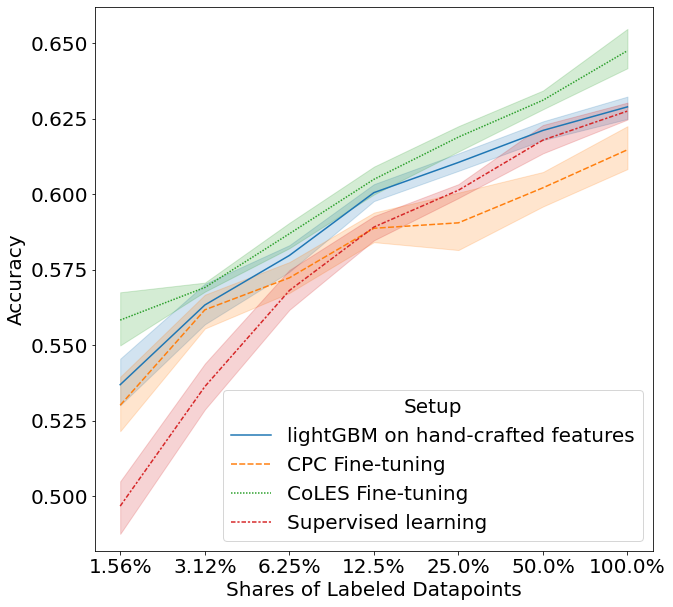

In [122]:
dataset = 'age_pred'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}__semi_supervised.txt"
figure_file = f"figures/ss_{dataset}_per.pdf"

semisupervised_plot(file_name, figure_file)

[500, 1000, 3000, 6000, 12000, 25000, 50000, 100000, 200000, 290000]
[(500, '0.17%'), (1133, '0.39%'), (4531, '1.56%'), (18125, '6.25%'), (72500, '25.0%'), (290000, '100.0%')]


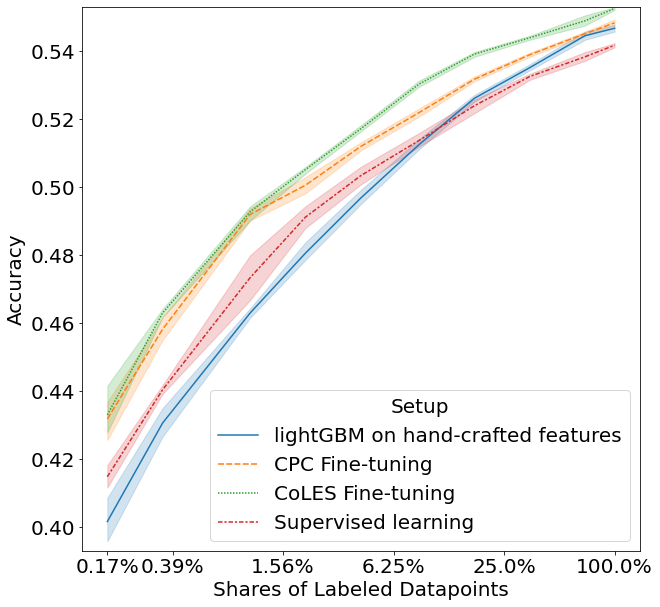

In [124]:
dataset = 'x5'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}_semi_supervised.txt"
figure_file = f"figures/ss_{dataset}_per.pdf"

semisupervised_plot(file_name, figure_file)

[496, 994, 1986, 3971, 7943, 15887]
[(496, '3.12%'), (994, '6.26%'), (1986, '12.5%'), (3972, '25.0%'), (7944, '50.0%'), (15888, '100.0%')]


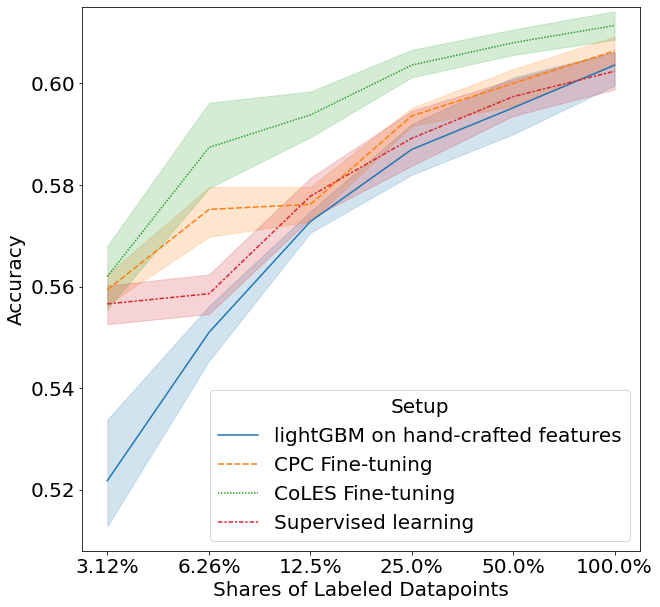

In [126]:
dataset = 'bowl2019'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}__semi_supervised.txt"
figure_file = f"figures/ss_{dataset}_per_.pdf"

semisupervised_plot(file_name, figure_file)

[225, 450, 900, 1800, 3600]
[(225, '6.25%'), (450, '12.5%'), (900, '25.0%'), (1800, '50.0%'), (3600, '100.0%')]


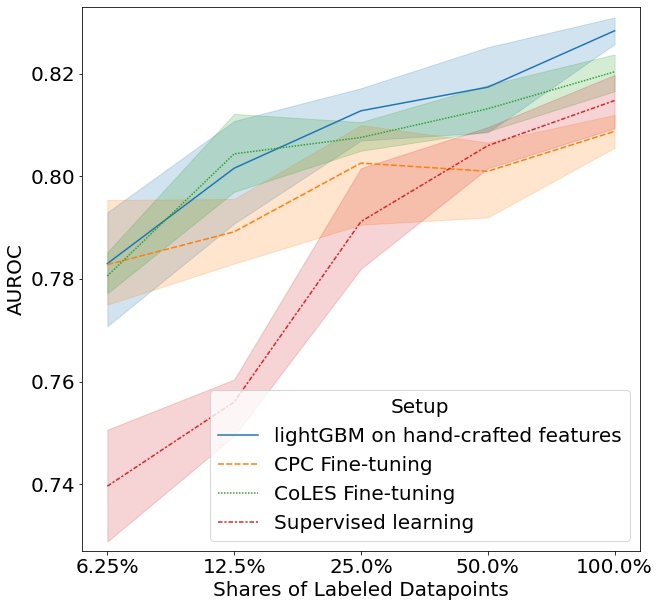

In [128]:
dataset = 'rosbank'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}__semi_supervised.txt"
figure_file = f"figures/ss_{dataset}_per_.pdf"

semisupervised_plot(file_name, figure_file)